# 📊 Atividade Prática – Regressão com Rede Neural MLP

---

### Integrantes do Grupo

* **Lucas Gabriel**
* **Vivian Raquel**
* **Samuel Araujo**
* **Fernanda Araujo**

---

### Descrição do Problema

Neste trabalho, será abordado um **problema real de regressão**, utilizando dados públicos de consumo de energia elétrica residencial. O objetivo é prever valores contínuos relacionados ao consumo elétrico a partir de variáveis numéricas, aplicando técnicas de **Aprendizado Profundo com Redes Neurais do tipo MLP (Multi-Layer Perceptron)**.

O foco está na aplicação prática de um **pipeline completo de aprendizado de máquina**, envolvendo pré-processamento de dados, treinamento, validação e avaliação do modelo.

---

### Objetivo da Regressão

O objetivo principal deste projeto é:

* Construir um modelo de **regressão baseado em MLP** capaz de prever o consumo de energia elétrica com boa precisão.

---

### Dataset Utilizado

* **Nome:** Individual Household Electric Power Consumption Dataset
* **Fonte:** UCI Machine Learning Repository
* **Link:** [https://archive.ics.uci.edu/dataset/235/individual](https://archive.ics.uci.edu/dataset/235/individual)

O dataset contém medições de consumo elétrico coletadas ao longo do tempo, incluindo variáveis como tensão, corrente e consumo global


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Pré-processamento dos dados

In [3]:
import pandas as pd

df = pd.read_csv(
    "dados.txt",
    sep=";",
    na_values="?",
    nrows=100000
)

In [4]:
# Dimensão do dataset
print(df.shape)


(100000, 9)


In [5]:
# Visualizar as primeiras linhas
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
# Identificar dados faltantes que podem afetar o modelo.
df.isnull().sum()


Date                     0
Time                     0
Global_active_power      8
Global_reactive_power    8
Voltage                  8
Global_intensity         8
Sub_metering_1           8
Sub_metering_2           8
Sub_metering_3           8
dtype: int64

In [7]:
# Remoção de linhas com valores ausentes
df = df.dropna()

# Nova dimensão do dataset
df.shape


(99992, 9)

In [8]:
X = df.drop(columns=["Global_active_power"])
y = df["Global_active_power"]

X.shape, y.shape


((99992, 8), (99992,))

In [9]:
# Remover colunas de data e hora
df_numerico = df.drop(columns=["Date", "Time"])

df_numerico.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
X = df_numerico.drop(columns=["Global_active_power"])
y = df_numerico["Global_active_power"]

X.dtypes


Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.model_selection import train_test_split

# Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((79993, 6), (19999, 6))

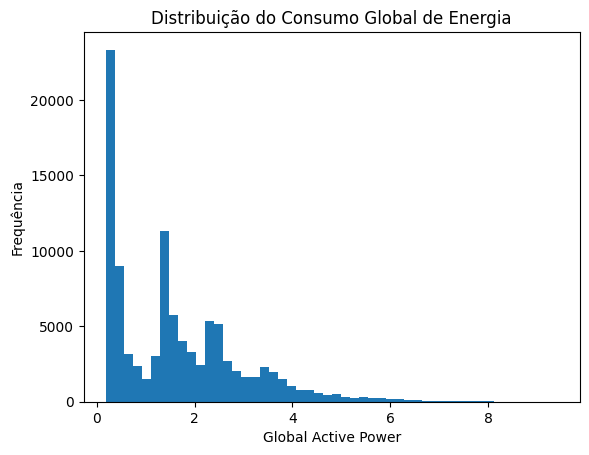

In [13]:
# Visualização da Variável Alvo (Exploração)
import matplotlib.pyplot as plt

plt.hist(y, bins=50)
plt.title("Distribuição do Consumo Global de Energia")
plt.xlabel("Global Active Power")
plt.ylabel("Frequência")
plt.show()


## Aplicação do modelo MLP

Nesse primeiro bloco, foi realizada a definição e configuração do modelo de rede neural, utilizando a classe MLPRegressor, pertencente à biblioteca scikit-learn. Nessa etapa, foram definidos os principais hiperparâmetros responsáveis por conduzir o comportamento da rede durante o processo de aprendizagem, como a estrutura das camadas ocultas, a função de ativação, o método de otimização e o número máximo de iterações de treinamento.

A arquitetura montada foi composta por duas camadas ocultas, composta por 64 e 32 neurônios, o que possibilitou ao modelo dar conta de aprender relações não lineares entre as variáveis de entrada e a variável alvo. A função de ativação ReLU foi escolhida por apresentar boa eficiência computacional. Já o algoritmo Adam foi utilizado como método de otimização o que facilitou a convergência do modelo. O limite de 200 iterações definiu o número máximo de ciclos de treinamento, enquanto o parâmetro random_state foi usado para garantir que os dados não tenham variação quando o modelo for executado novamente.

In [14]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)

In [15]:
#Treina a rede 
mlp.fit(X_train, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True


In [16]:
#gerando previsões da variável apartir dos dados do teste
y_pred = mlp.predict(X_test)

## Avaliação do desempenho do modelo MLP

Para a avaliação do desempenho do modelo MLP, foram importadas as métricas MAE, MSE e R² da biblioteca sklearn.metrics, assim como a biblioteca numpy. Inicialmente, foi calculado o MAE (Mean Absolute Error), que mede o erro médio absoluto entre os valores reais e os valores previstos pelo modelo, permitindo avaliar a magnitude média dos desvios nas previsões. Em seguida, foi calculado o MSE (Mean Squared Error), que corresponde à média dos erros elevados ao quadrado.

A partir do MSE, foi obtido o RMSE (Root Mean Squared Error), que expressa o erro na mesma escala da variável analisada, facilitando a interpretação do desempenho do modelo. Por fim, foi calculado o R² (coeficiente de determinação), utilizado para avaliar o grau de ajuste do modelo, indicando o quanto a variabilidade dos dados reais pode ser explicada pelas previsões geradas.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 0.0298
MSE: 0.0022
RMSE: 0.0467
R²: 0.9988


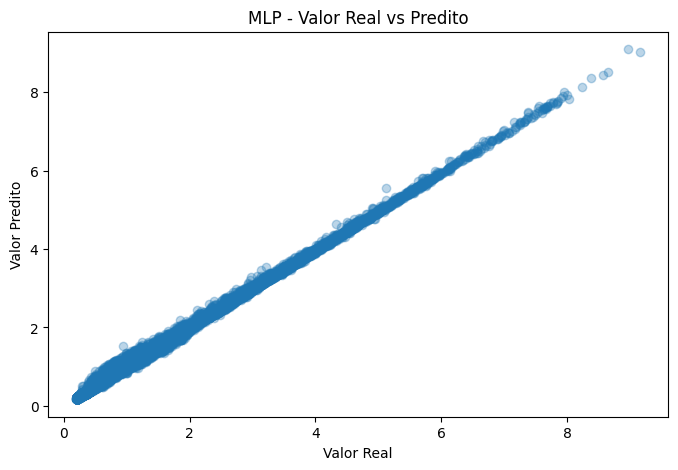

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("MLP - Valor Real vs Predito")
plt.show()


## Treinamento, Validação e Tuning de Hiperparâmetros

Após a etapa de pré-processamento e separação dos dados, foi realizado o treinamento da rede neural MLP utilizando o conjunto de dados de treino. O objetivo dessa fase foi ajustar os pesos da rede de forma a minimizar o erro entre os valores reais de consumo de energia elétrica e os valores preditos pelo modelo.

### Divisão dos Dados

Os dados foram divididos em conjuntos de treino e teste, utilizando a função train_test_split, com 80% dos dados destinados ao treinamento e 20% para teste. Essa separação permite avaliar a capacidade de generalização do modelo em dados não vistos durante o treinamento.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Treinamento do Modelo

O modelo foi treinado utilizando o algoritmo de otimização Adam, amplamente utilizado em redes neurais por sua eficiência e estabilidade. A função de ativação escolhida foi a ReLU, adequada para lidar com relações não lineares presentes nos dados de consumo energético.

O número máximo de iterações foi definido como 200, permitindo que a rede tivesse tempo suficiente para convergir sem causar sobreajuste excessivo.

In [20]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)

mlp.fit(X_train, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True


### Validação do Modelo

A validação do modelo foi realizada por meio da avaliação das previsões geradas no conjunto de teste. Essa abordagem permite verificar se o modelo aprendeu padrões relevantes e se mantém um bom desempenho fora do conjunto de treino.

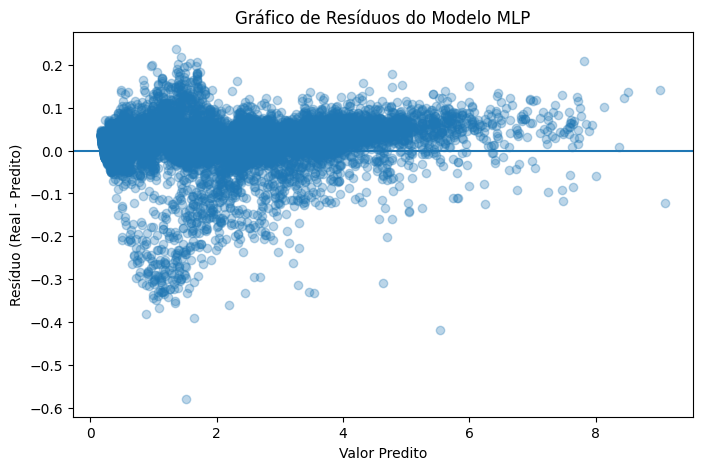

In [21]:
# Cálculo dos resíduos
residuos = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuos, alpha=0.3)
plt.axhline(0)
plt.xlabel("Valor Predito")
plt.ylabel("Resíduo (Real - Predito)")
plt.title("Gráfico de Resíduos do Modelo MLP")
plt.show()


O gráfico de resíduos permite analisar a distribuição dos erros do modelo. Idealmente, os resíduos devem se concentrar em torno de zero, indicando que o modelo não apresenta viés sistemático nas previsões. Dessa forma temos os numeros sempre ao redor de zero com pequenas variações demostrando a eficacia do processo.

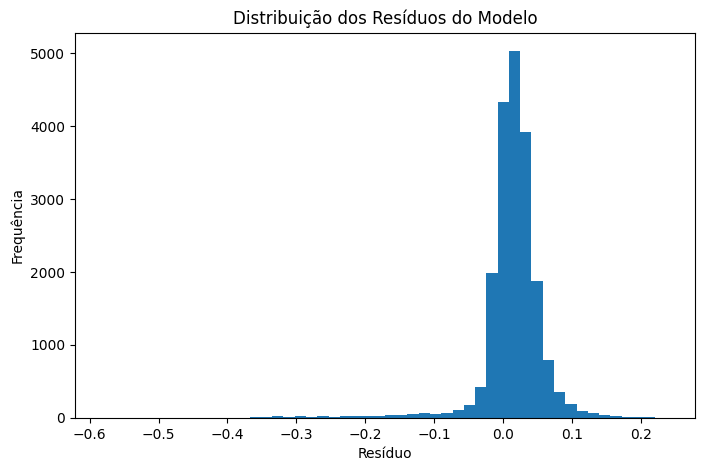

In [22]:
plt.figure(figsize=(8,5))
plt.hist(residuos, bins=50)
plt.title("Distribuição dos Resíduos do Modelo")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")
plt.show()

Observa-se que a maior parte dos resíduos está concentrada próxima de zero, indicando boa capacidade de previsão do modelo. Sua frequencia alta entorno de 0.0 e 0.2 mostra uma leve variação normal do modelo, demostrando que a possibilidade de acerto é muito boa.

In [23]:
y_pred = mlp.predict(X_test)

## Avaliação e Interpretação dos Resultados

A avaliação do desempenho do modelo de regressão baseado em MLP foi realizada utilizando as métricas MAE, MSE, RMSE e R², permitindo uma análise quantitativa precisa da qualidade das previsões de consumo de energia elétrica.

O MAE (Mean Absolute Error) obtido foi de 0,0298, indicando que, em média, as previsões do modelo apresentam um desvio absoluto inferior a 0,03 em relação aos valores reais de consumo. Esse resultado evidencia uma elevada precisão do modelo, uma vez que os erros médios são reduzidos e pouco impactantes do ponto de vista prático.

O MSE (Mean Squared Error) apresentou valor de 0,0022, o que demonstra que o modelo conseguiu minimizar de forma eficaz erros mais expressivos. Como essa métrica penaliza fortemente grandes discrepâncias entre valores previstos e reais, o baixo valor observado indica estabilidade nas previsões e ausência de erros extremos relevantes durante o processo de regressão.

A partir do MSE, foi calculado o RMSE (Root Mean Squared Error), resultando em 0,0467. Por estar na mesma escala da variável alvo, o RMSE facilita a interpretação prática do desempenho do modelo, indicando que o erro médio das previsões permanece inferior a 0,05 unidades de consumo. Esse resultado reforça a capacidade do MLP de capturar relações não lineares complexas presentes nos dados de consumo energético residencial.

Por fim, o coeficiente de determinação R² alcançou o valor de 0,9988, o que significa que aproximadamente 99,88% da variabilidade do consumo de energia elétrica foi explicada pelo modelo. Esse valor extremamente elevado indica um excelente ajuste aos dados, evidenciando que as variáveis de entrada utilizadas são altamente relevantes para a previsão do consumo e que a arquitetura da rede neural foi adequada ao problema proposto.

No contexto do dataset Individual Household Electric Power Consumption, esses resultados indicam que as variáveis elétricas disponibilizadas apresentam forte relação entre si, permitindo que o modelo aprenda padrões consistentes de comportamento energético ao longo do tempo. Como o conjunto de dados é composto por medições reais, coletadas em alta frequência e com baixo nível de ruído após o pré-processamento, o desempenho elevado do modelo sugere que o MLP foi capaz de explorar adequadamente a estrutura temporal e estatística dos dados. Dessa forma, as previsões geradas refletem de maneira fiel o perfil de consumo residencial, tornando o modelo potencialmente útil para aplicações como monitoramento energético, detecção de anomalias e apoio à tomada de decisão em eficiência energética.

De forma geral, os resultados obtidos demonstram que o modelo MLP apresentou desempenho excepcional no problema de regressão abordado. A combinação de uma arquitetura com duas camadas ocultas, função de ativação ReLU e otimizador Adam mostrou-se eficaz para modelar o comportamento do consumo de energia elétrica. Esses achados confirmam o potencial das redes neurais do tipo MLP como uma abordagem robusta e precisa para problemas reais de previsão de consumo energético.

## Discussão final
Os resultados obtidos com o modelo de regressão baseado em Multi-Layer Perceptron (MLP) indicam desempenho altamente satisfatório na previsão do consumo de energia elétrica residencial. A arquitetura composta por duas camadas ocultas, aliada à função de ativação ReLU e ao otimizador Adam, mostrou-se eficaz para capturar relações não lineares presentes no conjunto de dados analisado.

As métricas de avaliação confirmam a elevada precisão do modelo. O baixo valor de MAE demonstra que os desvios médios entre valores reais e preditos são reduzidos, enquanto o MSE e o RMSE indicam estabilidade nas previsões, sem ocorrência de erros extremos relevantes. O coeficiente de determinação R², próximo de 1, evidencia excelente ajuste do modelo, explicando praticamente toda a variabilidade do consumo energético.

A análise gráfica reforça esses resultados, mostrando forte alinhamento entre valores reais e preditos e resíduos distribuídos de forma aleatória em torno de zero, o que indica ausência de viés sistemático. Dessa forma, conclui-se que o modelo MLP apresentou elevada capacidade preditiva, sendo adequado para aplicações como monitoramento de consumo, análise de eficiência energética e apoio à tomada de decisão.